In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout

In [3]:
#
#* I am downsizing the images from (256,256) to (128,128) to make processing faster 

BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS=3

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'tomatoe_small',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
n_classes = len(class_names)


Found 4000 files belonging to 10 classes.


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
#! Potatoe

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
n_classes = len(class_names)

Found 2152 files belonging to 3 classes.


In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'TomatoeVillage',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
n_classes = len(class_names)

Found 16011 files belonging to 10 classes.


In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./255),
])

rescale = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(-0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2)
])


train_ds = train_ds.map(
    lambda x, y: (rescale(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = val_ds.map(
    lambda x, y: (rescale(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.map(
    lambda x, y: (rescale(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
for image_batch, labels_batch in train_ds.take(2):
    print(image_batch.shape)
    # print(labels_batch.numpy())
    print(labels_batch)
    # print(image_batch[0])

(32, 256, 256, 3)
tf.Tensor([8 7 7 4 5 0 7 7 7 4 9 6 2 9 7 9 9 4 7 0 2 7 0 7 0 0 1 7 2 0 3 0], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 9 9 7 1 7 7 5 7 5 5 2 4 1 7 4 2 7 1 1 2 0 2 7 2 4 5 0 7 7 7 6], shape=(32,), dtype=int32)


In [31]:
# I tried using a seed to see if the training results would be less random , but i got about the same results
tf.random.set_seed(42)

Here is where I start testing how much the layer effects the models's efficacy.

I also plotted the history metrics and did a model.evaluate and saved those. In this phase of the project i only saved the matplot graph, but later i saved the whole history.

Epoch 1/15
100/100 [==============================] - 39s 363ms/step - loss: 2.3030 - accuracy: 0.0931 - val_loss: 2.3032 - val_accuracy: 0.0859
Epoch 2/15
100/100 [==============================] - 37s 355ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3028 - val_accuracy: 0.1016
Epoch 3/15
100/100 [==============================] - 40s 388ms/step - loss: 2.3026 - accuracy: 0.1025 - val_loss: 2.3017 - val_accuracy: 0.1120
Epoch 4/15
100/100 [==============================] - 38s 368ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3029 - val_accuracy: 0.1068
Epoch 5/15
100/100 [==============================] - 39s 372ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3012 - val_accuracy: 0.1094
Epoch 6/15
100/100 [==============================] - 40s 380ms/step - loss: 2.3024 - accuracy: 0.0969 - val_loss: 2.3007 - val_accuracy: 0.0859
Epoch 7/15
100/100 [==============================] - 38s 368ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3018 - val_ac

<Figure size 640x480 with 0 Axes>

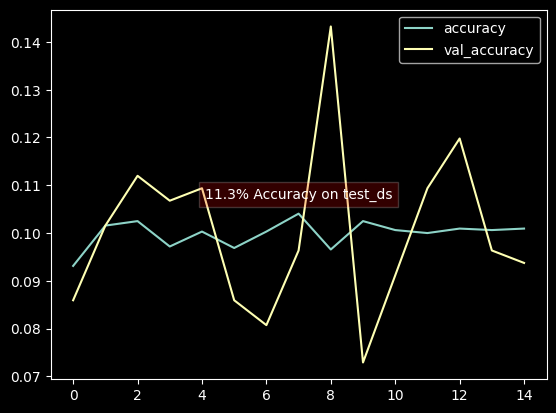

In [36]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# tf.random.set_seed(42)

model_ConV_1 = models.Sequential([
    # rescale,
    # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_1.build(input_shape=input_shape)


model_ConV_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_1_history = model_ConV_1.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_1_scores = model_ConV_1.evaluate(test_ds)
print(f"Loss = {model_ConV_1_scores[0]}")
print(f"Accuracy = {model_ConV_1_scores[1]}")
acc = model_ConV_1_scores[1]
model_ConV_1_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_1_formatted_acc}")

model_ConV_1_metrics = pd.DataFrame(model_ConV_1_history.history)
print(model_ConV_1_metrics.tail())

#? TIME = 9m 45s
#? ACC = 11.3%


plt.clf()
model_ConV_1_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_1_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_1.png')

plt.show()

Epoch 1/15
100/100 [==============================] - 52s 494ms/step - loss: 2.3035 - accuracy: 0.0978 - val_loss: 2.3022 - val_accuracy: 0.1120
Epoch 2/15
100/100 [==============================] - 50s 486ms/step - loss: 2.3026 - accuracy: 0.1056 - val_loss: 2.3017 - val_accuracy: 0.1042
Epoch 3/15
100/100 [==============================] - 51s 496ms/step - loss: 2.3025 - accuracy: 0.0972 - val_loss: 2.3034 - val_accuracy: 0.0911
Epoch 4/15
100/100 [==============================] - 52s 506ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3019 - val_accuracy: 0.0859
Epoch 5/15
100/100 [==============================] - 52s 508ms/step - loss: 2.3023 - accuracy: 0.1059 - val_loss: 2.3019 - val_accuracy: 0.0859
Epoch 6/15
100/100 [==============================] - 52s 507ms/step - loss: 2.3026 - accuracy: 0.1016 - val_loss: 2.3007 - val_accuracy: 0.1224
Epoch 7/15
100/100 [==============================] - 52s 503ms/step - loss: 2.3028 - accuracy: 0.0906 - val_loss: 2.3030 - val_ac

<Figure size 640x480 with 0 Axes>

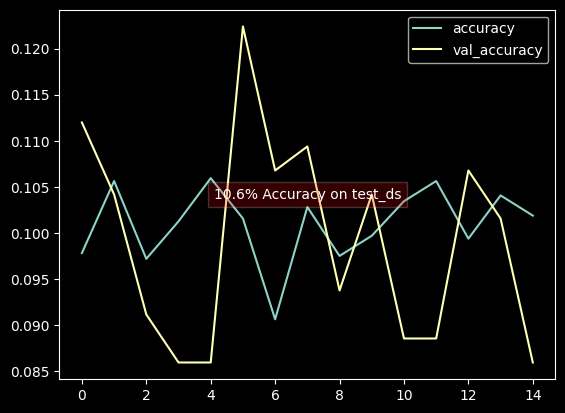

In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_2 = models.Sequential([
    # rescale,
    # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_2.build(input_shape=input_shape)


model_ConV_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_2_history = model_ConV_2.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_2_scores = model_ConV_2.evaluate(test_ds)
print(f"Loss = {model_ConV_2_scores[0]}")
acc = model_ConV_2_scores[1]
model_ConV_2_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_2_formatted_acc}")


model_ConV_2_metrics = pd.DataFrame(model_ConV_2_history.history)
model_ConV_2_metrics.head()

#? TIME = 13m 50s
#? ACC = 10%

plt.clf()
model_ConV_2_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_2_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_2.png')

plt.show()

In [54]:
model_ConV_2_metrics

,loss,accuracy,val_loss,val_accuracy
0,2.205267,0.193750,102.923714,0.216146
1,1.295253,0.545625,146.188004,0.442708
2,0.862357,0.699687,242.801086,0.406250
3,0.631066,0.781875,192.335510,0.505208
4,0.438729,0.853437,220.434647,0.572917
5,0.304517,0.900312,583.668396,0.289062
6,0.221062,0.933750,259.601715,0.513021
7,0.182763,0.943750,390.048218,0.377604
8,0.143592,0.954687,406.027618,0.497396
9,0.063363,0.983437,369.295502,0.494792


Epoch 1/15
100/100 [==============================] - 51s 487ms/step - loss: 2.3030 - accuracy: 0.0938 - val_loss: 2.3020 - val_accuracy: 0.0990
Epoch 2/15
100/100 [==============================] - 51s 495ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3025 - val_accuracy: 0.1068
Epoch 3/15
100/100 [==============================] - 55s 535ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.0964
Epoch 4/15
100/100 [==============================] - 57s 552ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch 5/15
100/100 [==============================] - 54s 521ms/step - loss: 2.3028 - accuracy: 0.0900 - val_loss: 2.3024 - val_accuracy: 0.1120
Epoch 6/15
100/100 [==============================] - 52s 507ms/step - loss: 2.3025 - accuracy: 0.1003 - val_loss: 2.3020 - val_accuracy: 0.1042
Epoch 7/15
100/100 [==============================] - 51s 491ms/step - loss: 2.3026 - accuracy: 0.0925 - val_loss: 2.3026 - val_ac

<Figure size 640x480 with 0 Axes>

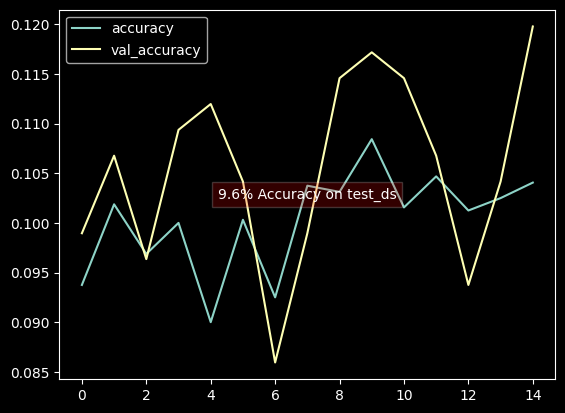

In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_3 = models.Sequential([
    # rescale,
    # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_3.build(input_shape=input_shape)


model_ConV_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_3_history = model_ConV_3.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_3_scores = model_ConV_3.evaluate(test_ds)
print(f"Loss = {model_ConV_3_scores[0]}")
acc = model_ConV_3_scores[1]
model_ConV_3_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_3_formatted_acc}")


model_ConV_3_metrics = pd.DataFrame(model_ConV_3_history.history)
model_ConV_3_metrics.head()

#? TIME = 13m 50s
#? ACC = 40%

plt.clf()
model_ConV_3_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_3_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_3.png')

plt.show()

Epoch 1/15
100/100 [==============================] - 53s 501ms/step - loss: 2.3035 - accuracy: 0.0959 - val_loss: 2.3024 - val_accuracy: 0.1276
Epoch 2/15
100/100 [==============================] - 53s 517ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.1172
Epoch 3/15
100/100 [==============================] - 55s 533ms/step - loss: 2.3027 - accuracy: 0.0947 - val_loss: 2.3033 - val_accuracy: 0.0885
Epoch 4/15
100/100 [==============================] - 56s 541ms/step - loss: 2.3026 - accuracy: 0.0962 - val_loss: 2.3032 - val_accuracy: 0.0938
Epoch 5/15
100/100 [==============================] - 54s 527ms/step - loss: 2.3024 - accuracy: 0.1044 - val_loss: 2.3021 - val_accuracy: 0.1198
Epoch 6/15
100/100 [==============================] - 55s 531ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3009 - val_accuracy: 0.1224
Epoch 7/15
100/100 [==============================] - 54s 524ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3024 - val_ac

<Figure size 640x480 with 0 Axes>

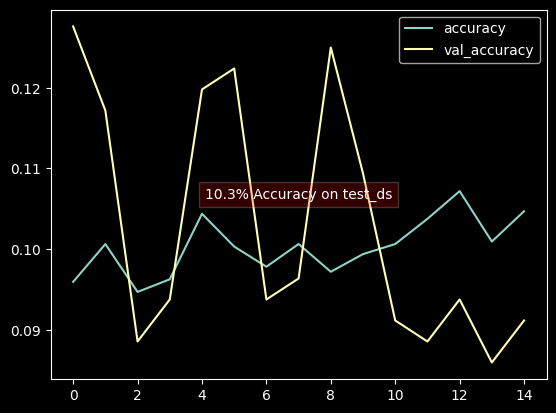

In [38]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_4 = models.Sequential([
    # rescale,
    # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_4.build(input_shape=input_shape)


model_ConV_4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_4_history = model_ConV_4.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_4_scores = model_ConV_4.evaluate(test_ds)
print(f"Loss = {model_ConV_4_scores[0]}")
acc = model_ConV_4_scores[1]
model_ConV_4_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_4_formatted_acc}")


model_ConV_4_metrics = pd.DataFrame(model_ConV_4_history.history)
model_ConV_4_metrics.head()

#? TIME = 13m 50s
#? ACC = 10.3%

plt.clf()
model_ConV_4_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_4_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_4.png')

plt.show()

Epoch 1/15
100/100 [==============================] - 56s 535ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3015 - val_accuracy: 0.1042
Epoch 2/15
100/100 [==============================] - 56s 536ms/step - loss: 2.3028 - accuracy: 0.1013 - val_loss: 2.3024 - val_accuracy: 0.1094
Epoch 3/15
100/100 [==============================] - 54s 521ms/step - loss: 2.3027 - accuracy: 0.0916 - val_loss: 2.3016 - val_accuracy: 0.0964
Epoch 4/15
100/100 [==============================] - 55s 531ms/step - loss: 2.3029 - accuracy: 0.1016 - val_loss: 2.3023 - val_accuracy: 0.1120
Epoch 5/15
100/100 [==============================] - 54s 524ms/step - loss: 2.3023 - accuracy: 0.1037 - val_loss: 2.3035 - val_accuracy: 0.0911
Epoch 6/15
100/100 [==============================] - 55s 531ms/step - loss: 2.3028 - accuracy: 0.0959 - val_loss: 2.3014 - val_accuracy: 0.0938
Epoch 7/15
100/100 [==============================] - 57s 551ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3023 - val_ac

<Figure size 640x480 with 0 Axes>

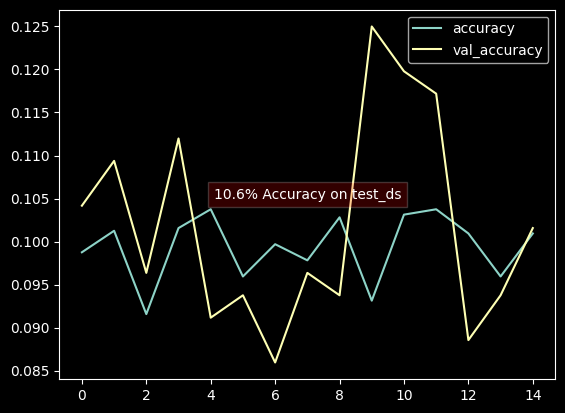

In [39]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_5 = models.Sequential([
    # rescale,
    # layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_5.build(input_shape=input_shape)


model_ConV_5.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_5_history = model_ConV_5.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_5_scores = model_ConV_5.evaluate(test_ds)
print(f"Loss = {model_ConV_5_scores[0]}")
acc = model_ConV_5_scores[1]
model_ConV_5_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_5_formatted_acc}")


model_ConV_5_metrics = pd.DataFrame(model_ConV_5_history.history)
model_ConV_5_metrics.head()

#? TIME = 13m 50s
#? ACC = 10.6

plt.clf()
model_ConV_5_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_5_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_5.png')

plt.show()

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_6 = models.Sequential([
    # rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_ConV_6.build(input_shape=input_shape)


model_ConV_6.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_6_history = model_ConV_6.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_6_scores = model_ConV_6.evaluate(test_ds)
print(f"Loss = {model_ConV_6_scores[0]}")
acc = model_ConV_6_scores[1]
model_ConV_6_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_6_formatted_acc}")


model_ConV_6_metrics = pd.DataFrame(model_ConV_6_history.history)
model_ConV_6_metrics.head()

#? TIME = 13m 50s
#? ACC = 40%

plt.clf()
model_ConV_6_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_6_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV_6.png')

plt.show()

I tried adding more regularizaton with the dropout layers and batch normalization but it had no effect

Epoch 1/15
100/100 [==============================] - 61s 576ms/step - loss: 2.1564 - accuracy: 0.1953 - val_loss: 2.8512 - val_accuracy: 0.0990
Epoch 2/15
100/100 [==============================] - 58s 560ms/step - loss: 1.8325 - accuracy: 0.3491 - val_loss: 18.5714 - val_accuracy: 0.0938
Epoch 3/15
100/100 [==============================] - 58s 560ms/step - loss: 1.5048 - accuracy: 0.4781 - val_loss: 12.3264 - val_accuracy: 0.0990
Epoch 4/15
100/100 [==============================] - 60s 580ms/step - loss: 1.2928 - accuracy: 0.5575 - val_loss: 36.2368 - val_accuracy: 0.1562
Epoch 5/15
100/100 [==============================] - 60s 584ms/step - loss: 1.1674 - accuracy: 0.5884 - val_loss: 86.4212 - val_accuracy: 0.0885
Epoch 6/15
100/100 [==============================] - 60s 579ms/step - loss: 1.0875 - accuracy: 0.6216 - val_loss: 538.9560 - val_accuracy: 0.0990
Epoch 7/15
100/100 [==============================] - 59s 573ms/step - loss: 1.0500 - accuracy: 0.6316 - val_loss: 535.0797 

<Figure size 640x480 with 0 Axes>

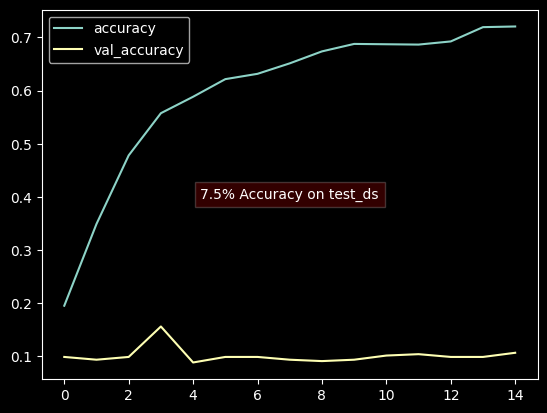

In [50]:

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_dropOut = models.Sequential([
    
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add BatchNormalization layer here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),  # Add Dropout layer here with dropout rate of 0.5 (adjust as needed)
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model_ConV_dropOut.build(input_shape=input_shape)


model_ConV_dropOut.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_dropOut_history = model_ConV_dropOut.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

model_ConV_dropOut_scores = model_ConV_dropOut.evaluate(test_ds)
print(f"Loss = {model_ConV_dropOut_scores[0]}")
acc = model_ConV_dropOut_scores[1]
model_ConV_dropOut_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_dropOut_formatted_acc}")


model_ConV_dropOut_metrics = pd.DataFrame(model_ConV_dropOut_history.history)
model_ConV_dropOut_metrics.head()

#? TIME = 14m 40s
#? ACC = 7.5%

plt.clf()
model_ConV_dropOut_metrics[['accuracy','val_accuracy']].plot()

plt.text(0.5, 0.5, f'{model_ConV_dropOut_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\model_ConV__dropOut.png')

plt.show()

# TIME = 14m 13s
# ACC = 40%

I wondered if i was being stupid so i tried the same model on the potatoe dataset (which was not my focus) and i got much better results. 

In [11]:
#
#! Testing potatoe
n_classes = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_dropOUt = models.Sequential([
    
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add BatchNormalization layer here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),  # Add Dropout layer here with dropout rate of 0.5 (adjust as needed)
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model_ConV_dropOUt.build(input_shape=input_shape)


model_ConV_dropOUt.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_dropOUt_history = model_ConV_dropOUt.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

model_ConV_dropOUt_scores = model_ConV_dropOUt.evaluate(test_ds)
print(f"Loss = {model_ConV_dropOUt_scores[0]}")
print(f"Accuracy = {model_ConV_dropOUt_scores[1]}")

model_ConV_dropOUt_metrics = pd.DataFrame(model_ConV_dropOUt_history.history)
model_ConV_dropOUt_metrics.tail()

# TIME = 1h
# ACC = 98%

Epoch 1/20
54/54 [==============================] - 105s 2s/step - loss: 0.7078 - accuracy: 0.7688 - val_loss: 0.9368 - val_accuracy: 0.4948
Epoch 2/20
54/54 [==============================] - 118s 2s/step - loss: 0.3041 - accuracy: 0.8873 - val_loss: 0.8317 - val_accuracy: 0.7500
Epoch 3/20
54/54 [==============================] - 121s 2s/step - loss: 0.1685 - accuracy: 0.9396 - val_loss: 0.4527 - val_accuracy: 0.8229
Epoch 4/20
54/54 [==============================] - 115s 2s/step - loss: 0.1033 - accuracy: 0.9648 - val_loss: 0.3344 - val_accuracy: 0.9062
Epoch 5/20
54/54 [==============================] - 133s 2s/step - loss: 0.0997 - accuracy: 0.9648 - val_loss: 2.6997 - val_accuracy: 0.5208
Epoch 6/20
54/54 [==============================] - 163s 3s/step - loss: 0.1223 - accuracy: 0.9548 - val_loss: 0.7003 - val_accuracy: 0.7500
Epoch 7/20
54/54 [==============================] - 152s 3s/step - loss: 0.1029 - accuracy: 0.9630 - val_loss: 0.6913 - val_accuracy: 0.7552
Epoch 8/20
54

,loss,accuracy,val_loss,val_accuracy
15,0.062445,0.975352,0.263089,0.963542
16,0.029312,0.990023,0.092426,0.979167
17,0.044236,0.984742,0.955115,0.838542
18,0.017148,0.994718,1.775158,0.781250
19,0.017531,0.994131,0.107614,0.947917


Finally got around to the full dataset and now I finally got some decent results!

Its very clear from the graph that the model is underfitted (i.e. need more epochs). Very likely that the model has only reached local minima.

I figured out after lots of fiddling that what what was causing the low performance was actually NOT the smaller dataset, but instead how i implemented the resolution downsampling. When i used image_dataset_from_directory and set the image_size parameter to 128x128 it tanked the performance of the models. 

I have yet to understand why this is the case. Maybe i have missintepreted the image_size parameter.

In [12]:
#
#! Full Tomatoe
n_classes = 10
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model_ConV_dropOUt = models.Sequential([
    
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Add BatchNormalization layer here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.25),  # Add Dropout layer here with dropout rate of 0.5 (adjust as needed)
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model_ConV_dropOUt.build(input_shape=input_shape)


model_ConV_dropOUt.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_ConV_dropOUt_history = model_ConV_dropOUt.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

model_ConV_dropOUt_scores = model_ConV_dropOUt.evaluate(test_ds)
print(f"Loss = {model_ConV_dropOUt_scores[0]}")
print(f"Accuracy = {model_ConV_dropOUt_scores[1]}")

model_ConV_dropOUt_metrics = pd.DataFrame(model_ConV_dropOUt_history.history)
model_ConV_dropOUt_metrics.tail()

# TIME = 168m
# ACC = 96%

Epoch 1/10
400/400 [==============================] - 1064s 3s/step - loss: 0.8868 - accuracy: 0.7033 - val_loss: 1.0540 - val_accuracy: 0.6531
Epoch 2/10
400/400 [==============================] - 1049s 3s/step - loss: 0.4617 - accuracy: 0.8406 - val_loss: 1.9742 - val_accuracy: 0.6000
Epoch 3/10
400/400 [==============================] - 870s 2s/step - loss: 0.3437 - accuracy: 0.8833 - val_loss: 2.2425 - val_accuracy: 0.5437
Epoch 4/10
400/400 [==============================] - 851s 2s/step - loss: 0.2950 - accuracy: 0.8995 - val_loss: 0.2491 - val_accuracy: 0.9200
Epoch 5/10
400/400 [==============================] - 867s 2s/step - loss: 0.2230 - accuracy: 0.9244 - val_loss: 0.8164 - val_accuracy: 0.7744
Epoch 6/10
400/400 [==============================] - 895s 2s/step - loss: 0.2178 - accuracy: 0.9264 - val_loss: 1.4024 - val_accuracy: 0.6775
Epoch 7/10
400/400 [==============================] - 872s 2s/step - loss: 0.1675 - accuracy: 0.9428 - val_loss: 1.8720 - val_accuracy: 0.63

,loss,accuracy,val_loss,val_accuracy
5,0.217770,0.926406,1.402403,0.677500
6,0.167494,0.942797,1.871985,0.635000
7,0.156398,0.945849,0.521216,0.845000
8,0.141907,0.952187,0.423403,0.869375
9,0.121083,0.959073,0.114010,0.960000


Accuracy = 96.3%


<Figure size 640x480 with 0 Axes>

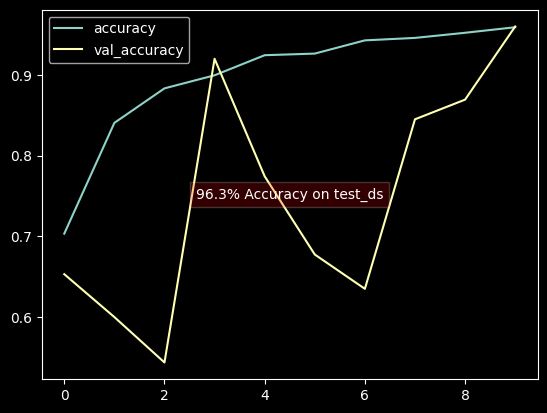

In [17]:
plt.clf()
# model_ConV_dropOUt_metrics
model_ConV_dropOUt_metrics[['accuracy','val_accuracy']].plot()

acc = model_ConV_dropOUt_scores[1]
# acc = model_ConV_dropOut_scores[1]
model_ConV_dropOut_formatted_acc = "{:.1%}".format(acc)
print(f"Accuracy = {model_ConV_dropOut_formatted_acc}")


plt.text(0.5, 0.5, f'{model_ConV_dropOut_formatted_acc} Accuracy on test_ds', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.2))
plt.savefig('C:\\Users\\Magnus\\Desktop\\code\\timeSeries\\model_plots\\Full_model_ConV__dropOut.png')

plt.show()

I save this model so that i have a decent one

In [18]:
# Save the model
model_name = 'full_tomatoe'
os.makedirs(f'my_models/{model_name}', exist_ok=True)
model_version = '1'
model_ConV_dropOUt.save('my_models/{}/model_version_{}'.format(model_name,model_version))

INFO:tensorflow:Assets written to: full_tomatoe\assets


INFO:tensorflow:Assets written to: full_tomatoe\assets


I try some more elaborate model architectures in the tomatoe_tuning_222 notebook